<h1>Linear Regression 1D: Training One Parameter</h1>


<h2>Objective</h2><ul><li> How to create cost or criterion function using MSE (Mean Square Error).</li></ul> 


<h2>Table of Contents</h2>
<p>In this lab, you will train a model with PyTorch by using data that you created. The model only has one parameter: the slope.</p>

<ul>
    <li><a href="#Make-Some-Data">Make Some Data</a></li>
    <li><a href="#Create-the-Model-and-Cost-Function-(Total-Loss)">Create the Model and Cost Function (Total Loss)</a></li>
    <li><a href="#Train-the-Model">Train the Model</a></li>
</ul>

<h2>Preparation</h2>


The following are the libraries we are going to use for this lab.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

The class <code>plot_diagram</code> helps us to visualize the data space and the parameter space during training and has nothing to do with PyTorch.


In [2]:
class plot_diagram():
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))

        parameter_values_tensor = torch.tensor(self.parameter_values)
        loss_function_tensor = torch.tensor(self.Loss_function)

        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    def __del__(self):
        plt.close('all')

<h2 id="Makeup_Data">Make Some Data</h2>


Import PyTorch library:


In [3]:
import torch

Generate values from -3 to 3 that create a line with a slope of -3. This is the line you will estimate.


In [4]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

Let us plot the line.


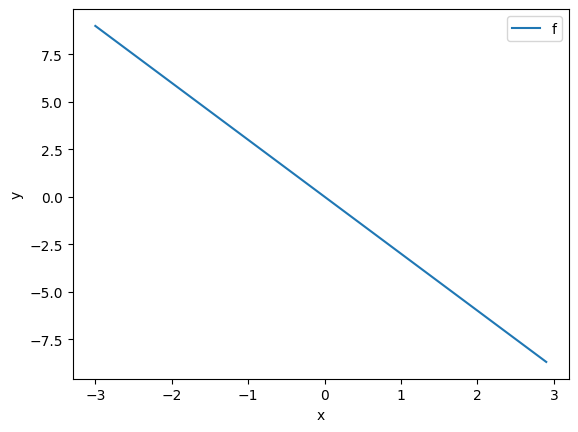

In [5]:
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Let us add some noise to the data in order to simulate the real data. Use <code>torch.randn(X.size())</code> to generate Gaussian noise that is the same size as <code>X</code> and has a standard deviation opf 0.1.


In [6]:
Y = f + 0.1 * torch.randn(X.size())

Plot the <code>Y</code>: 


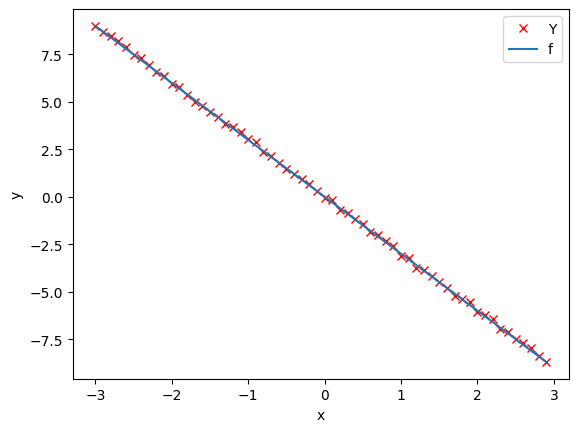

In [7]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h2 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h2>


In this section, let us create the model and the cost function (total loss) we are going to use to train the model and evaluate the result.


First, define the <code>forward</code> function $y=w*x$. (We will add the bias in the next lab.)


In [8]:
def forward(x):
    return w * x

Define the cost or criterion function using MSE (Mean Square Error): 


In [9]:
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Define the learning rate <code>lr</code> and an empty list <code>LOSS</code> to record the loss for each iteration:   


In [34]:
lr = 0.1
LOSS = []

Now, we create a model parameter by setting the argument <code>requires_grad</code> to <code>True</code> because the system must learn it.


In [35]:
w = torch.tensor(-10.0, requires_grad=True)

Create a <code>plot_diagram</code> object to visualize the data space and the parameter space for each iteration during training:


In [36]:
gradient_plot = plot_diagram(X, Y, w, stop=5)

<h2 id="Train">Train the Model</h2>


Let us define a function for training the model. The steps will be described in the comments.


In [37]:
def train_model(iter):
    for epoch in range (iter):
        Yhat = forward(X)
        loss = criterion(Yhat,Y)
        gradient_plot(Yhat, w, loss.item(), epoch)
        LOSS.append(loss.item())
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()

Let us try to run 4 iterations of gradient descent:  


/tmp/ipykernel_35/902631477.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


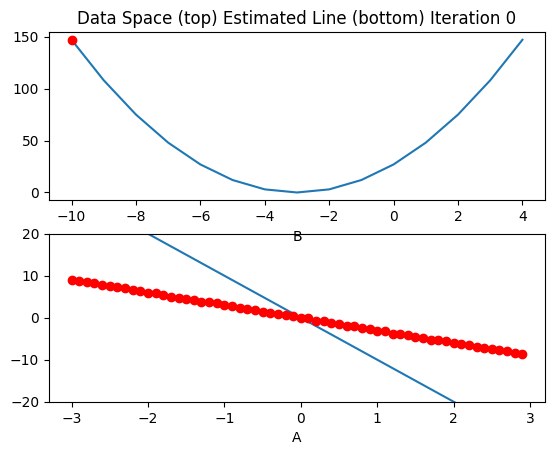

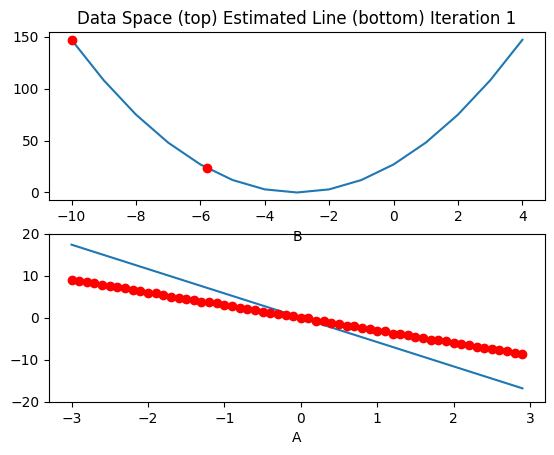

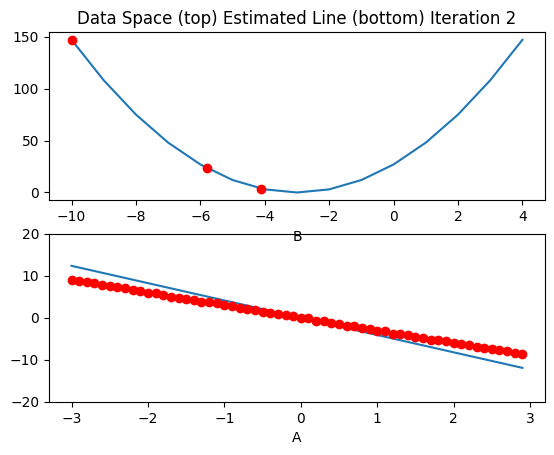

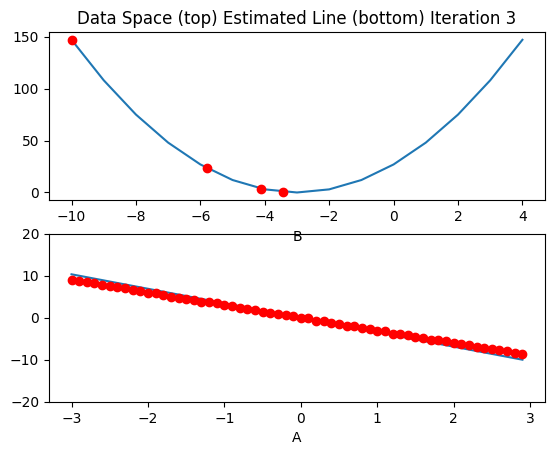

<Figure size 640x480 with 0 Axes>

In [38]:
train_model(4)

Plot the cost for each iteration: 


Text(38.347222222222214, 0.5, 'Cost')

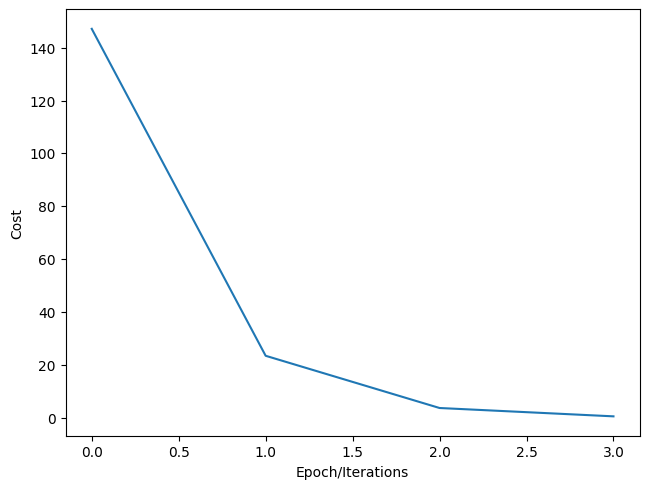

In [39]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<h3>Practice</h3>


Create a new learnable parameter <code>w</code> with an initial value of -15.0.

In [40]:
w = torch.tensor(-15.0, requires_grad=True)

Create an empty list <code>LOSS2</code>:


In [41]:
LOSS2 = []

Write your own <code>my_train_model</code> function with loss list <code>LOSS2</code>. And run it with 4 iterations.


In [42]:
gradient_plot_2 = plot_diagram(X, Y, w, stop=15)

def train_model_2(iter):
    for epoch in range (iter):
        Yhat = forward(X)
        loss = criterion(Yhat,Y)
        gradient_plot_2(Yhat, w, loss.item(), epoch)
        LOSS2.append(loss.item())
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()

Plot an overlay of the list <code>LOSS2</code> and <code>LOSS</code>. 


/tmp/ipykernel_35/902631477.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


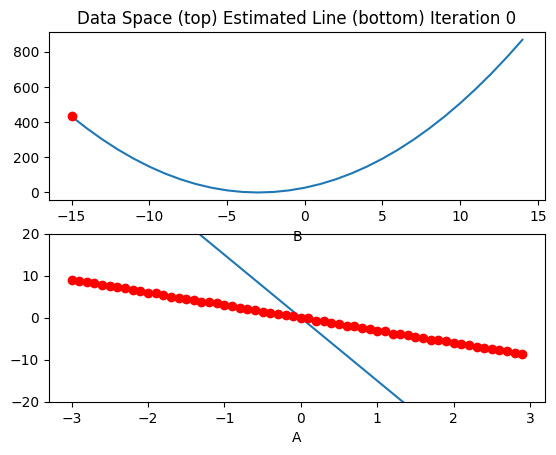

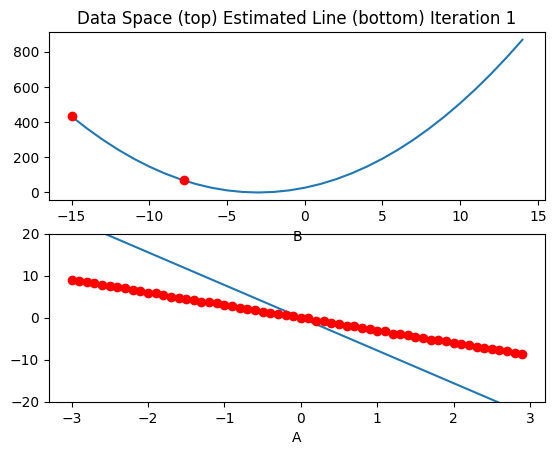

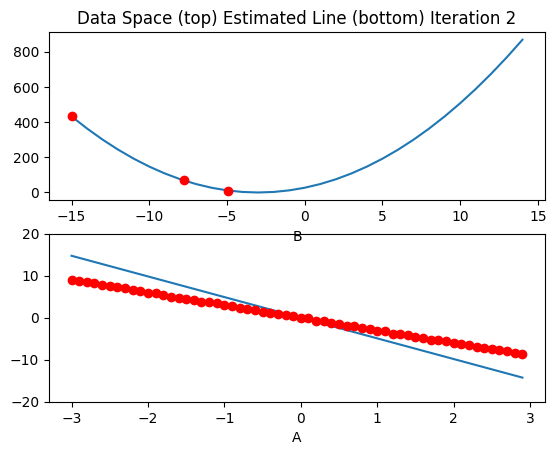

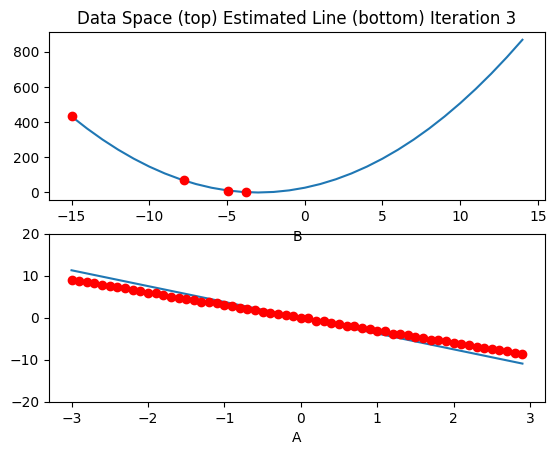

<Figure size 640x480 with 0 Axes>

In [43]:
train_model_2(4)

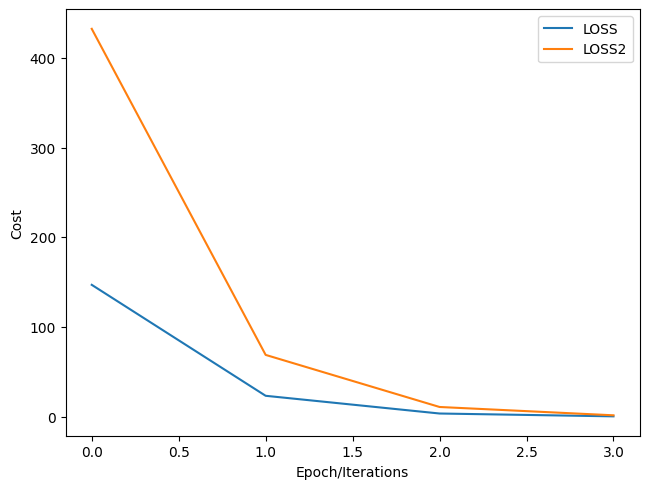

In [44]:
plt.plot(LOSS, label = "LOSS")
plt.plot(LOSS2, label = "LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()